In [1]:
import pickle

In [26]:
import numpy as np

In [2]:
class Question_pair:
    def __init__(self, id, qid1, qid2, question1, question2, is_duplicate):
        self.id = id
        self.gid1 = qid1
        self.qid2 = qid2
        self.question1 = question1
        self.question2 = question2
        self.is_duplicate = False if is_duplicate is "0" else True
        
    def show(self):
        print ("id:", self.id,"gid1:", self.gid1,"qid2:", self.qid2,"question1:", self.question1,"question2:", self.question2,"is_duplicate:", self.is_duplicate,)
      
    def __str__(self):
        return ("id:", self.id,"gid1:", self.gid1,"qid2:", self.qid2,"question1:", self.question1,"question2:", self.question2,"is_duplicate:", self.is_duplicate,)
   

In [3]:
question = pickle.load(open( "./data/preprocessed.plk", "rb" ))

In [4]:
question[0].question1

'What is the step by step guide to invest in share market in india?'

In [5]:
question_text1 = []
question_text2 = []
question_combination = []

are_duplicate = []

for q in question:
    question_text1.append(q.question1)
    question_text2.append(q.question2)
    question_combination.append(q.question1 + " " + q.question2)
    are_duplicate.append(q.is_duplicate)

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

words_train_tfidf = TfidfVectorizer(use_idf=True).fit(question_combination)

In [7]:
from sklearn.metrics.pairwise import cosine_similarity

In [8]:
words_train_tfidf1 = words_train_tfidf.transform(question_text1)
words_train_tfidf2 = words_train_tfidf.transform(question_text2)

In [23]:
words_train_tfidf1.get_shape()

(404279, 86139)

In [18]:
words_train_tfidf2

<404279x86139 sparse matrix of type '<class 'numpy.float64'>'
	with 4084436 stored elements in Compressed Sparse Row format>

In [15]:
cosine_similarity(words_train_tfidf1[0], words_train_tfidf2[0])[0][0]

0.97924429407290137

In [24]:
cosine_similarities = []
for x in range(0,words_train_tfidf1.get_shape()[0]):
    cosine_similarities.append(cosine_similarity(words_train_tfidf1[x], words_train_tfidf2[x])[0][0])

In [27]:
np.mean(cosine_similarities)

0.49543796415050906

In [30]:
file_path = "./results/tf_idf_cosine_unpreprocessed.csv"

import csv
with open(file_path, 'a') as outcsv:   
    #configure writer to write standard csv file
    writer = csv.writer(outcsv, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL, lineterminator='\n')
    writer.writerow(['number'])
    for item in cosine_similarities:
        #Write item to outcsv
        writer.writerow([item])

In [34]:
from sklearn.metrics import average_precision_score
print (average_precision_score(are_duplicate, cosine_similarities))

0.573543265903


In [35]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

treshold = 0.1
step = 0.05

f1_scores = []
precision_scores = []
recall_scores = []
accuracy_scores = []

tresholds = []

while treshold <= 0.91:
    print (treshold)
    
    f1_scores.append(f1_score(are_duplicate, [True if x > treshold else False for x in cosine_similarities]))
    precision_scores.append(precision_score(are_duplicate, [True if x > treshold else False for x in cosine_similarities]))
    recall_scores.append(recall_score(are_duplicate, [True if x > treshold else False for x in cosine_similarities]))
    accuracy_scores.append(accuracy_score(are_duplicate, [True if x > treshold else False for x in cosine_similarities]))    

    tresholds.append(treshold)
    treshold = treshold + step

0.1
0.15000000000000002
0.2
0.25
0.3
0.35
0.39999999999999997
0.44999999999999996
0.49999999999999994
0.5499999999999999
0.6
0.65
0.7000000000000001
0.7500000000000001
0.8000000000000002
0.8500000000000002
0.9000000000000002


In [56]:
f1_scores

[0.58701277251706674,
 0.59638465017068276,
 0.60866281980776649,
 0.62129159676357537,
 0.63137567897128921,
 0.63698644525934212,
 0.63669903441850795,
 0.62928544983339507,
 0.61307093935682866,
 0.58883750442326699,
 0.55496982500477143,
 0.5135894499491418,
 0.4652812584338975,
 0.41223520695113325,
 0.35524095603641692,
 0.28981100178844776,
 0.21451269078816476]

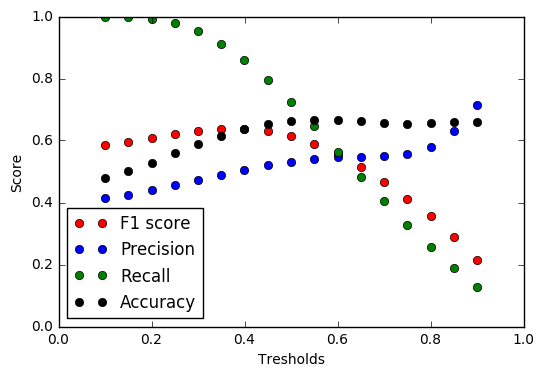

In [73]:
import matplotlib.pyplot as plt
plt.plot(tresholds, f1_scores, 'ro', label='F1 score')
plt.plot(tresholds, precision_scores, 'bo',label='Precision')
plt.plot(tresholds, recall_scores, 'go',label='Recall')
plt.plot(tresholds, accuracy_scores, 'ko',label='Accuracy')
#plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.xlabel("Tresholds")
plt.ylabel("Score")
plt.legend(loc=3)
plt.axis([0,1,0,1])
plt.show()